In [9]:
import pandas as pd
import numpy as np
# order = pd.read_csv('./order_data_2016-01-01')
order = pd.read_table("./order_data_2016-01-01", delim_whitespace=True, header=None)
col = ['oid','did','pid','start','end','price','date','time']
order.columns = col
order.head()

,oid,did,pid,start,end,price,date,time
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24,2016-01-01,13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2,2016-01-01,09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9,2016-01-01,18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11,2016-01-01,22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4,2016-01-01,17:00:06


In [25]:
order.describe()

,price
count,501287.000000
mean,18.792990
std,16.913423
min,0.000000
25%,8.000000
50%,14.000000
75%,23.000000
max,499.000000


In [26]:
driver = set(order['did'])
len(driver)

37661

In [27]:
passenger = set(order['pid'])
len(passenger)

250378

In [28]:
start = set(order['start'])
end = set(order['end'])
len(start)
# len(end)   363    we consider only the start point here

66

In [29]:
zone_dict = {}
#dist = pd.read_table("../cluster_map/cluster_map", delim_whitespace=True, header=None)
f = file('../cluster_map/cluster_map', 'r')
zone_list = []
# iterate over the lines in the file
for line in f:
    # split the line into a list of column values
    column = line.split('\n')[0]
    columns = column.split('\t')
    # clean any whitespace off the items
    # columns = [col.strip() for col in columns]

    # ensure the column has at least one value before printing
    if columns:
        zone_dict[columns[0]] = columns[1] # print the first column
        zone_list.append(columns[0])
zone_dict

{'08232402614a9b48895cc3d0aeb0e9f2': '50',
 '08f5b445ec6b29deba62e6fd8b0325a6': '43',
 '0a5fef95db34383403d11cb6af937309': '63',
 '1afd7afbc81ecc1b13886a569d869e8a': '46',
 '1c60154546102e6525f68cb4f31e0657': '56',
 '1cbfbdd079ef93e74405c53fcfff8567': '6',
 '1ecbb52d73c522f184a6fc53128b1ea1': '66',
 '2301bc920194c95cf0c7486e5675243c': '31',
 '2350be163432e42270d2670cb3c02f80': '18',
 '2407d482f0ffa22a947068f2551fe62c': '28',
 '2920ece99323b4c111d6f9affc7ea034': '14',
 '307afa4120c590b3a46cf4ff5415608a': '16',
 '364bf755f9b270f0f9141d1a61de43ee': '21',
 '38d5ad2d22b61109fd8e7b43cd0e8901': '24',
 '3a43dcdff3c0b66b1acb1644ff055f9d': '25',
 '3e12208dd0be281c92a6ab57d9a6fb32': '47',
 '445ff793ebd3477d4a2e0b36b2db9271': '55',
 '44c097b7bd219d104050abbafe51bd49': '35',
 '4725c39a5e5f4c188d382da3910b3f3f': '23',
 '49ac89aa860c27e26c0836cb8dab2df2': '60',
 '4b7f6f4e2bf237b6cc58f57142bea5c0': '13',
 '4b9e4cf2fbdc8281b8a1f9f12b80ce4d': '5',
 '4f4041f7db0c7f69892d9b74c1a7efa1': '10',
 '4f8d81b5c31

In [30]:
zone_dict['ed8eb1876d270f25e29fe4339ad41524'] = 67

In [31]:
print range(1,67)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [32]:
order['start_index'] = order['start'].map(lambda x : zone_dict[x])
#order['end_index'] = filter(lambda x: x in zone_list,  order['end'])
order.tail()

,oid,did,pid,start,end,price,date,time,start_index
501282,3f89a682ad12708095da4cbe2ccdab90,ac8c9e9a93fd7466ea26e729ce719dc4,56242551b109c1836958fa1ba09d94ba,74c1c25f4b283fa74a5514307b0d0278,74c1c25f4b283fa74a5514307b0d0278,7.0,2016-01-01,20:43:07,12
501283,677a78060b26e60191ff874b2b07be1d,48f1dca979de77f9a1db47cf867317f7,f5636ff3c2dbce0bf29283abbd0d48d7,2407d482f0ffa22a947068f2551fe62c,91690261186ae5bee8f83808ea1e4a01,7.0,2016-01-01,15:27:42,28
501284,b63daeda6d2f6d07af9d3bb37ebc8318,8c4c2fea7256337d2bbcc9fd2d1ae349,92ce1d70618e510792555ff10d96dd61,929ec6c160e6f52c20a4217c7978f681,d4ec2125aff74eded207d2d915ef682f,15.0,2016-01-01,21:49:58,7
501285,c0060c34335286a268f6783bf860062c,9ea6d19f8607f1a0df3fa1577b32953a,b030de3d2c88ba6d88b1eca06c74050f,825a21aa308dea206adb49c4b77c7805,2308e5edf2fbee52203b5c262f557ddf,12.0,2016-01-01,13:05:37,65
501286,892d1416f003cd5b0d7d751d69900e02,c20498e62d06829df93c2b1455866d3d,d5a45b1681a35d2d456d62d51556ec0d,d4ec2125aff74eded207d2d915ef682f,d4ec2125aff74eded207d2d915ef682f,10.6,2016-01-01,11:05:59,51


In [33]:
import numpy as np
#accept = order[order['did'].isnull()]   175710
accept = order[order['did'].notnull()] # 325577 =      501287
gap = order[order['did'].isnull()]

In [34]:
accept.describe()

,price
count,325577.000000
mean,17.445547
std,15.742865
min,0.000000
25%,8.000000
50%,13.000000
75%,21.400000
max,463.000000


In [35]:
import os
import matplotlib.pyplot as plt
#import seaborn as sns 
#from mpl_toolkits.basemap import Basemap
%matplotlib inline


In [36]:
accept['i'] = accept['start_index'].map(lambda x : int(x) / 11 )
accept['j'] = accept['start_index'].map(lambda x : int(x) % 11 )
gap = order[order['did'].isnull()]
gap['i'] = gap['start_index'].map(lambda x : int(x) / 11)
gap['j'] = gap['start_index'].map(lambda x : int(x) % 11)
accept.head()

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the doc

,oid,did,pid,start,end,price,date,time,start_index,i,j
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24,2016-01-01,13:37:23,23,2,1
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2,2016-01-01,09:47:54,8,0,8
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9,2016-01-01,18:24:02,32,2,10
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11,2016-01-01,22:13:27,13,1,2
6,17c1c85144ab532947c7ea724fdcc945,115ac9b23f00a2e6d8a3041e23469f41,2f206d28eb6d7daa6d058304c00782de,a5609739c6b5c2719a3752327c5e33a7,a5609739c6b5c2719a3752327c5e33a7,6,2016-01-01,17:34:33,19,1,8


In [37]:
accept_grid = accept.groupby(['i','j'], as_index=False).count()

In [38]:
accept_grid

,i,j,oid,did,pid,start,end,price,date,time,start_index
0,0,1,23185,23185,23185,23185,23185,23185,23185,23185,23185
1,0,2,2322,2322,2322,2322,2322,2322,2322,2322,2322
2,0,3,292,292,292,292,292,292,292,292,292
3,0,4,5802,5802,5802,5802,5802,5802,5802,5802,5802
4,0,5,309,309,309,309,309,309,309,309,309
5,0,6,1561,1561,1561,1561,1561,1561,1561,1561,1561
6,0,7,14432,14432,14432,14432,14432,14432,14432,14432,14432
7,0,8,24341,24341,24341,24341,24341,24341,24341,24341,24341
8,0,9,3995,3995,3995,3995,3995,3995,3995,3995,3995
9,0,10,298,298,298,298,298,298,298,298,298


ValueError: third arg must be a format string

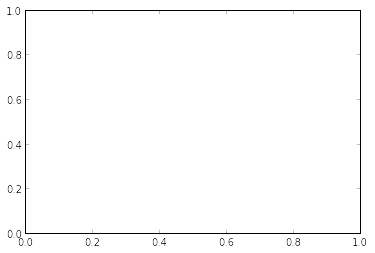

In [40]:

from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm  
from matplotlib.ticker import LinearLocator, FormatStrFormatter  
fig = plt.figure()  

#ax = fig.gca(projection='3d') 
ax = fig.gca() 
X = accept_grid['i'].tolist() 
Y = accept_grid['j'].tolist() 
X, Y = np.meshgrid(X, Y)  
R = accept_grid['oid'].tolist()   
Z = R  
ax.plot(X, Y, Z)  
ax.set_zlim(-1.01, 1.01)  
 
ax.zaxis.set_major_locator(LinearLocator(10))  
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))  
 
#fig.colorbar(surf, shrink=0.5, aspect=5)  
 
plt.show() 


In [41]:
import numpy
X = accept_grid['i'].tolist() 
Y = accept_grid['j'].tolist()
data = accept_grid['oid'].reshape(6,11)
print data


[[23185  2322   292  5802   309  1561 14432 24341  3995   298  2824]
 [14205  1328  8215    80   894   522   804  5536  7872  7973  3397]
 [28847  7996  3558  2226  7261 16822  2977   261  1141   260   860]
 [  838   970  2687 12326  1095   713   747   762  8565   301    78]
 [  429  9468   840 19410   216   164 54132   129   873  1855   202]
 [  580  1465   337   283   105   296    44    34  1471   254  1512]]


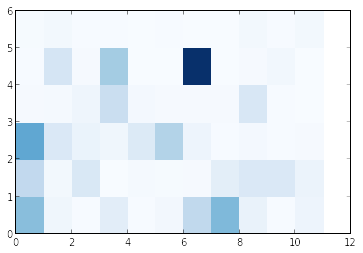

In [42]:
from matplotlib import pyplot as plt
import matplotlib as mpl
#heatmap = plt.pcolor(data)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
#ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
#ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

#ax.set_xticklabels(X, minor=False)
#ax.set_yticklabels(Y, minor=False)

In [43]:
accept_grid[accept_grid['i']== 5] #7

,i,j,oid,did,pid,start,end,price,date,time,start_index
54,5,0,202,202,202,202,202,202,202,202,202
55,5,1,580,580,580,580,580,580,580,580,580
56,5,2,1465,1465,1465,1465,1465,1465,1465,1465,1465
57,5,3,337,337,337,337,337,337,337,337,337
58,5,4,283,283,283,283,283,283,283,283,283
59,5,5,105,105,105,105,105,105,105,105,105
60,5,6,296,296,296,296,296,296,296,296,296
61,5,7,44,44,44,44,44,44,44,44,44
62,5,8,34,34,34,34,34,34,34,34,34
63,5,9,1471,1471,1471,1471,1471,1471,1471,1471,1471


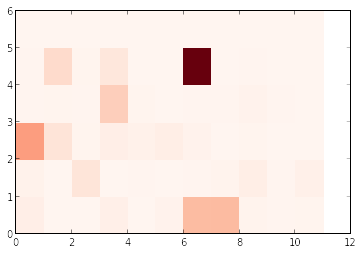

In [44]:
gap_grid = gap.groupby(['i','j'], as_index=False).count()
Xg = gap_grid['i'].tolist() 
Yg = gap_grid['j'].tolist()
datag = gap_grid['oid'].reshape(6,11)
heatmap = plt.pcolor(datag, cmap=mpl.cm.Reds)

In [45]:
accept_by_start_index = accept.groupby(['start_index'], as_index=False).count()

In [46]:
accept_by_start_index

,start_index,oid,did,pid,start,end,price,date,time,i,j
0,1,23185,23185,23185,23185,23185,23185,23185,23185,23185,23185
1,10,298,298,298,298,298,298,298,298,298,298
2,11,2824,2824,2824,2824,2824,2824,2824,2824,2824,2824
3,12,14205,14205,14205,14205,14205,14205,14205,14205,14205,14205
4,13,1328,1328,1328,1328,1328,1328,1328,1328,1328,1328
5,14,8215,8215,8215,8215,8215,8215,8215,8215,8215,8215
6,15,80,80,80,80,80,80,80,80,80,80
7,16,894,894,894,894,894,894,894,894,894,894
8,17,522,522,522,522,522,522,522,522,522,522
9,18,804,804,804,804,804,804,804,804,804,804


In [47]:
#  split the datetime into 144 bins everyday
#  and group the order data into grid && time slot
#  distinct_driver_nb distinct_passenger_nb avg_price grid//start_index (-> poi)  slot(->weather)  => trafic slot_order next_slot_order_nb

#  construct a grid poi table


poifile = file('../poi_data/poi_data', 'r')
max_l1_cat = 0
max_l2_cat = 0

for line in poifile:
    # split the line into a list of column values
    #print line
    col = line.split('\n')[0]
    
    pois = col.split('\t')
    #print pois
    # clean any whitespace off the items
    # columns = [col.strip() for col in columns]

    # ensure the column has at least one value before printing
    i = 0
    for i in range(1,len(pois)):
       
        p = pois[i].split(':')[0].split('#')
        #print p
        #if(len(p) == 1 and int(p[0]) > max_l1_cat):
        if(int(p[0]) > max_l1_cat):
            print "yes"
            max_l1_cat = int(p[0])
        if(len(p) > 1 and int(p[1]) > max_l2_cat):
            print "ok"
            max_l2_cat = int(p[1])
                
                
print max_l1_cat
print max_l2_cat
                
                
                



yes
ok
yes
yes
ok
ok
ok
ok
ok
ok
25
18


In [48]:
w, h = 67, 25 * 18 

poi_matrix = [[0 for x in range(h)] for y in range(w)] 
print len(poi_matrix)
print len(poi_matrix[0])

67
450


In [49]:
# Creates a list containing 5 lists, each of 8 items, all set to 0

poifile = file('../poi_data/poi_data', 'r')
count = 1
for line in poifile:
    # print count 
    count = count + 1
    # split the line into a list of column values
    #print line
    col = line.split('\n')[0]
    #print col
    pois = col.split('\t')
    #print pois
    # clean any whitespace off the items
    # columns = [col.strip() for col in columns]

    # ensure the column has at least one value before printing
    i = 0
    row = int(zone_dict[pois[0]])
    #print row
    for i in range(1,len(pois)):
        p = pois[i].split(':')[0].split('#')
        #print "level1 " + p[0]
        if(len(p) == 1 ):
            poi_matrix[row][(int(p[0])-1) * 18 ] = (int)(pois[i].split(':')[1])
        if(len(p) > 1):
            #print "level2 " + (p[1])
            #print (int(p[0])-1) * 25 + int(p[1])
            poi_matrix[row][(int(p[0])-1) * 18 + int(p[1])] =(int) (pois[i].split(':')[1])

In [50]:
poi_matrix2 = [[0 for x in range(h)] for y in range(w)] 
poifile = file('../poi_data/poi_data', 'r')
count = 1
for line in poifile:
    # print count 
    count = count + 1
    # split the line into a list of column values
    #print line
    col = line.split('\n')[0]
    #print col
    pois = col.split('\t')
    #print pois
    # clean any whitespace off the items
    # columns = [col.strip() for col in columns]

    # ensure the column has at least one value before printing
    i = 0
    row = int(zone_dict[pois[0]])
    #print row
    for i in range(1,len(pois)):
        p = pois[i].split(':')[0].split('#')
        #print "level1 " + p[0]
        if(len(p) == 1 ):
            poi_matrix2[row-1][(int(p[0])-1) * 18 ] = (int)(pois[i].split(':')[1])
        if(len(p) > 1):
            #print "level2 " + (p[1])
            #print (int(p[0])-1) * 25 + int(p[1])
            poi_matrix2[row-1][(int(p[0])-1) * 18 + int(p[1])] =(int) (pois[i].split(':')[1])

In [51]:
#  define a function to transform time to time_slot  timestamp 144
def time2slot(time):
    hms =  time.split(":")
    hour = hms[0]
    minute = hms[1]
    second = hms[2]
    cur = (int)(hour) * 6 + (int)(minute) / 10 + 1
    #print time
    return cur

#a = order['time']
#a.map(lambda x: time2slot(x))
#a
#print time2slot('01:10:00')
#print time2slot(order['time'][1])
#print time2slot(order['time'][2])
#print time2slot(order['time'][3])
order['slot'] = order['time'].map(lambda x : time2slot(x))
#set(order['slot'])

In [140]:
weather = pd.read_table("../weather_data/weather_data_2016-01-01", delim_whitespace=True, header=None)
wea_col = ['date','time','type','tampreture','pm25']

In [141]:
weather.dtypes

0     object
1     object
2      int64
3    float64
4      int64
dtype: object

In [53]:
weather.columns = wea_col
weather['slot'] = weather['time'].map(lambda x: time2slot(x))
weather.describe()

,type,tampreture,pm25,slot
count,279.000000,279.000000,279.000000,279.000000
mean,2.247312,6.344086,178.157706,71.103943
std,1.932248,3.502809,29.412415,41.525583
min,1.000000,2.000000,126.000000,1.000000
25%,1.000000,3.000000,153.500000,35.500000
50%,2.000000,7.000000,181.000000,70.000000
75%,2.000000,9.000000,205.000000,106.500000
max,9.000000,13.000000,232.000000,144.000000


In [54]:
#  road level traffic flow

def traffic2flow(string):
    pair = string.split(":")
    level = pair[0]
    flow = pair[1]
    return flow

In [55]:
traffic = pd.read_table("../traffic_data/traffic_data_2016-01-01", delim_whitespace=True, header=None)
tra_col = ['index','one','two','three','four','date','time']
traffic.columns = tra_col
traffic['slot'] = traffic['time'].map(lambda x: time2slot(x))
traffic['grid'] = traffic['index'].map(lambda x: zone_dict[x])
traffic['one'] = traffic['one'].map(lambda x: traffic2flow(x))
traffic['two'] = traffic['two'].map(lambda x: traffic2flow(x))
traffic['three'] = traffic['three'].map(lambda x: traffic2flow(x))
traffic['four'] = traffic['four'].map(lambda x: traffic2flow(x))
traffic.head()
# traffic table

,index,one,two,three,four,date,time,slot,grid
0,1ecbb52d73c522f184a6fc53128b1ea1,231,33,13,10,2016-01-01,23:30:22,142,66
1,1ecbb52d73c522f184a6fc53128b1ea1,305,69,13,16,2016-01-01,09:10:25,56,66
2,bf44d327f0232325c6d5280926d7b37d,579,87,28,16,2016-01-01,21:50:27,132,64
3,bf44d327f0232325c6d5280926d7b37d,242,28,10,9,2016-01-01,06:20:15,39,64
4,bf44d327f0232325c6d5280926d7b37d,471,35,15,17,2016-01-01,00:50:26,6,64


In [56]:
# order table
order.head()

,oid,did,pid,start,end,price,date,time,start_index,slot
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24,2016-01-01,13:37:23,23,82
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2,2016-01-01,09:47:54,8,59
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9,2016-01-01,18:24:02,32,111
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11,2016-01-01,22:13:27,13,134
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4,2016-01-01,17:00:06,27,103


In [58]:
# weather table
weather.head()

,date,time,type,tampreture,pm25,slot
0,2016-01-01,00:00:28,1,4,177,1
1,2016-01-01,00:05:24,1,3,177,1
2,2016-01-01,00:10:08,1,3,177,2
3,2016-01-01,00:15:27,1,3,177,2
4,2016-01-01,00:20:06,1,3,177,3


In [59]:
len(zone_dict)

67

In [60]:
len(poi_matrix)

67

In [61]:
# poi table
poi = pd.DataFrame(data = poi_matrix, columns = range(0, 25*18), index = range(1,68))


In [62]:
poi2 = pd.DataFrame(data = poi_matrix2, columns = range(0, 25*18), index = range(0, 67))
poi2.head()

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,2739,498,1909,0,83,8051,83,0,4814,0,...,1079,3984,0,0,0,0,0,0,0,0
1,1245,83,913,0,83,5644,166,0,747,0,...,1162,2988,0,0,0,0,0,0,0,0
2,83,0,83,0,0,166,332,0,0,83,...,0,498,0,0,0,0,0,0,0,0
3,332,83,415,0,166,2573,0,0,913,0,...,747,1743,0,0,0,0,0,0,0,0
4,83,0,0,83,83,249,415,0,0,83,...,0,166,0,0,0,0,0,0,0,0


In [63]:
poi.head()

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2739,498,1909,0,83,8051,83,0,4814,0,...,1079,3984,0,0,0,0,0,0,0,0
3,1245,83,913,0,83,5644,166,0,747,0,...,1162,2988,0,0,0,0,0,0,0,0
4,83,0,83,0,0,166,332,0,0,83,...,0,498,0,0,0,0,0,0,0,0
5,332,83,415,0,166,2573,0,0,913,0,...,747,1743,0,0,0,0,0,0,0,0


In [64]:
poi.tail()

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
63,0,0,0,0,0,0,83,0,0,0,...,0,83,0,0,0,0,0,0,0,0
64,83,0,83,0,83,415,0,83,0,0,...,83,747,0,0,0,0,0,0,0,0
65,747,249,581,0,83,3652,166,0,1162,166,...,913,2075,0,0,0,0,0,0,0,0
66,166,83,83,0,0,415,0,0,332,0,...,166,1245,0,0,0,0,0,0,0,0
67,830,166,913,249,166,1494,83,83,1411,83,...,498,1577,0,0,0,0,0,0,0,0


In [65]:
poi['grid'] = poi.index
poi.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,grid
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2739,498,1909,0,83,8051,83,0,4814,0,...,3984,0,0,0,0,0,0,0,0,2
3,1245,83,913,0,83,5644,166,0,747,0,...,2988,0,0,0,0,0,0,0,0,3
4,83,0,83,0,0,166,332,0,0,83,...,498,0,0,0,0,0,0,0,0,4
5,332,83,415,0,166,2573,0,0,913,0,...,1743,0,0,0,0,0,0,0,0,5


In [66]:
poi2['grid'] = poi2.index +1
poi2.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,grid
0,2739,498,1909,0,83,8051,83,0,4814,0,...,3984,0,0,0,0,0,0,0,0,1
1,1245,83,913,0,83,5644,166,0,747,0,...,2988,0,0,0,0,0,0,0,0,2
2,83,0,83,0,0,166,332,0,0,83,...,498,0,0,0,0,0,0,0,0,3
3,332,83,415,0,166,2573,0,0,913,0,...,1743,0,0,0,0,0,0,0,0,4
4,83,0,0,83,83,249,415,0,0,83,...,166,0,0,0,0,0,0,0,0,5


In [67]:
acceptorder = order[order['did'].notnull()]
acceptorder.head()

,oid,did,pid,start,end,price,date,time,start_index,slot
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24,2016-01-01,13:37:23,23,82
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2,2016-01-01,09:47:54,8,59
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9,2016-01-01,18:24:02,32,111
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11,2016-01-01,22:13:27,13,134
6,17c1c85144ab532947c7ea724fdcc945,115ac9b23f00a2e6d8a3041e23469f41,2f206d28eb6d7daa6d058304c00782de,a5609739c6b5c2719a3752327c5e33a7,a5609739c6b5c2719a3752327c5e33a7,6,2016-01-01,17:34:33,19,106


In [68]:
accept_acc = acceptorder.groupby(['start_index','slot'], as_index=False).count()

In [69]:
acceptgb = acceptorder.groupby(['start_index','slot'], as_index=False)

In [70]:
help(pd.merge)

Help on function merge in module pandas.tools.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame (SQL: left outer join)
        * right: use only keys from right frame (SQL: right outer join)
        * outer: use union of keys from both frames (SQL: full outer join)
        * inner: use intersection of keys from both frames (SQL: inner join)
    on : label or list
        Field names to join on. Must be fo

In [71]:
avgprice = acceptgb['price'].agg({'avg_price':np.mean})
count = acceptgb['time'].agg({'count':np.count_nonzero})
orderinfo = pd.merge(avgprice, count, how='outer', on=['start_index', 'slot'])
orderinfo.head()   # start index 1-66

,start_index,slot,avg_price,count
0,1,1,19.365169,178
1,1,2,15.424084,191
2,1,3,16.516484,182
3,1,4,16.395210,167
4,1,5,17.171053,152


In [72]:
print orderinfo.size / 4

7905


In [76]:
help(pd.rolling_mean)

Help on function roll_mean in module pandas.algos:

roll_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
    Moving mean.
    
    Parameters
    ----------
    arg : Series, DataFrame
    window : int
        Size of the moving window. This is the number of observations used for
        calculating the statistic.
    min_periods : int, default None
        Minimum number of observations in window required to have a value
        (otherwise result is NA).
    freq : string or DateOffset object, optional (default None)
        Frequency to conform the data to before computing the statistic. Specified
        as a frequency string or DateOffset object.
    center : boolean, default False
        Set the labels at the center of the window.
    how : string, default 'None'
        Method for down- or re-sampling
    
    Returns
    -------
    y : type of input argument
    
    Notes
    -----
    By default, the result is set to the right edge of the win

In [136]:
#orderinfo3 = pd.rolling_mean(orderinfo['avg_price'], 3)
#orderinfo3.head()
#print orderinfo3.size
orderinfo['avg_price_3'] = pd.rolling_mean(orderinfo['avg_price'],3).shift(1)
orderinfo['avg_count_3'] = pd.rolling_mean(orderinfo['count'], 3).shift(1)
orderinfo['price_delta_1'] = orderinfo['avg_price'] / orderinfo['avg_price'].shift(1) - 1
orderinfo['price_delta_3'] = pd.rolling_mean(orderinfo['price_delta_1'],2).shift(1)

In [128]:
help(orderinfo.dropna())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, d

In [137]:
#o = orderinfo.dropna(how = 'any')
#o.head()
orderinfo.head()

,start_index,slot,avg_price,count,grid,avg_price_3,avg_count_3,price_delta_1,price_delta_3
0,1,1,19.365169,178,1,NaN,NaN,NaN,NaN
1,1,2,15.424084,191,1,NaN,NaN,-0.203514,NaN
2,1,3,16.516484,182,1,NaN,NaN,0.070824,NaN
3,1,4,16.395210,167,1,17.101912,183.666667,-0.007343,-0.066345
4,1,5,17.171053,152,1,16.111926,180.000000,0.047321,0.031741


In [138]:
o = orderinfo.dropna(how = 'any')
del o['start_index']
del o['avg_price']
del o['count']
del o['price_delta_1']
o.head()

,slot,grid,avg_price_3,avg_count_3,price_delta_3
3,4,1,17.101912,183.666667,-0.066345
4,5,1,16.111926,180.000000,0.031741
5,6,1,16.694249,167.000000,0.019989
6,7,1,17.142953,150.000000,0.043798
7,8,1,17.549274,136.666667,0.013183


In [86]:
print orderinfo.size  # 7905 * 4 = 31620  complete 66 * 144 = 9504
print order.size

39525
5012870


In [87]:
print 9*144

1296


In [88]:
len(set(orderinfo['start_index']))

66

In [89]:
orderinfo['grid'] = orderinfo['start_index'].map(lambda x: (int)(x))

#orderinfo.drop(['start_index'])
#orderpoi = pd.merge(orderinfo, poi2, how='left', on=['grid'])
poi2.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,grid
0,2739,498,1909,0,83,8051,83,0,4814,0,...,3984,0,0,0,0,0,0,0,0,1
1,1245,83,913,0,83,5644,166,0,747,0,...,2988,0,0,0,0,0,0,0,0,2
2,83,0,83,0,0,166,332,0,0,83,...,498,0,0,0,0,0,0,0,0,3
3,332,83,415,0,166,2573,0,0,913,0,...,1743,0,0,0,0,0,0,0,0,4
4,83,0,0,83,83,249,415,0,0,83,...,166,0,0,0,0,0,0,0,0,5


In [90]:
orderinfo.dtypes

start_index     object
slot             int64
avg_price      float64
count            int64
avg_count      float64
grid             int64
dtype: object

In [91]:
weather.head()

,date,time,type,tampreture,pm25,slot
0,2016-01-01,00:00:28,1,4,177,1
1,2016-01-01,00:05:24,1,3,177,1
2,2016-01-01,00:10:08,1,3,177,2
3,2016-01-01,00:15:27,1,3,177,2
4,2016-01-01,00:20:06,1,3,177,3


In [139]:
weather.dtypes

date           object
time           object
type            int64
tampreture    float64
pm25            int64
slot            int64
dtype: object

In [94]:
weather.size
print 1674 / 6
wgb = weather.groupby(['slot'], as_index=False)
wtype = wgb['type'].agg({'wtype':np.max})
wtemp = wgb['tampreture'].agg({'wtemp':np.mean})
wpm25 = wgb['pm25'].agg({'wpm25':np.mean})
wea1 = pd.merge(wtype, wtemp, how ='outer' , on = ['slot'])
wea = pd.merge(wea1, wpm25, how = 'outer', on = ['slot'])
print wea.size / 4
print len(set(weather['slot']))

279
142
142


In [96]:
orderweather = pd.merge(orderinfo, wea, how='left', on=['slot'])
orderweather.head()

,start_index,slot,avg_price,count,avg_count,grid,wtype,wtemp,wpm25
0,1,1,19.365169,178,NaN,1,1,3.5,177
1,1,2,15.424084,191,NaN,1,1,3.0,177
2,1,3,16.516484,182,NaN,1,1,3.0,177
3,1,4,16.395210,167,183.666667,1,1,3.0,177
4,1,5,17.171053,152,180.000000,1,1,3.0,177


In [97]:
traffic['grid'] = traffic['grid'].map(lambda x : (int) (x))
traffic.dtypes

index    object
one      object
two      object
three    object
four     object
date     object
time     object
slot      int64
grid      int64
dtype: object

In [99]:
traffic['one'] = traffic['one'].map(lambda x: (int) (x))
traffic['two'] = traffic['two'].map(lambda x: (int) (x))
traffic['three'] = traffic['three'].map(lambda x: (int) (x))
traffic['four'] = traffic['four'].map(lambda x: (int) (x))

orderweathertraffic = pd.merge(orderweather, traffic, how='inner', on=['slot','grid'])
orderweathertraffic.tail()

,start_index,slot,avg_price,count,avg_count,grid,wtype,wtemp,wpm25,index,one,two,three,four,date,time
7712,9,140,19.346154,26,21.333333,9,2,8,126,b702e920dcd2765e624dc1ce3a770512,583,95,31,26,2016-01-01,23:10:24
7713,9,141,21.916667,12,21.000000,9,2,8,126,b702e920dcd2765e624dc1ce3a770512,574,83,42,26,2016-01-01,23:20:23
7714,9,142,20.526316,19,18.333333,9,2,8,126,b702e920dcd2765e624dc1ce3a770512,529,82,34,26,2016-01-01,23:30:22
7715,9,143,15.285714,28,19.000000,9,2,8,131,b702e920dcd2765e624dc1ce3a770512,554,79,20,20,2016-01-01,23:40:21
7716,9,144,15.750000,8,19.666667,9,2,8,131,b702e920dcd2765e624dc1ce3a770512,485,83,38,14,2016-01-01,23:50:20


In [ ]:
print orderpoiweathertraffic.size / 465

In [ ]:
print traffic.size / 9

In [ ]:
traffic.dtypes
#traffic[traffic['grid'] == 1]

In [ ]:
len(set(traffic['slot']))

In [ ]:
orderpoiweathertraffic.columns

In [ ]:
del orderpoiweathertraffic['index']
del orderpoiweathertraffic['date']
del orderpoiweathertraffic['time']


In [ ]:
orderpoiweathertraffic.fillna(orderpoiweathertraffic.mean())

In [ ]:
gap_training = pd.read_csv('../gap_training_set')
gap_training.head()

In [1]:
import pandas as pd
import numpy as np
gap_train = pd.read_csv('../gap_training_set.csv')
gap_train.head()

,grid,slot,count,avg_price_3,avg_count_3,price_delta_3,count_delta_1,count_delta_3,min_type_3,avg_temp_3,...,441,442,443,444,445,446,447,448,449,dayOfWeek
0,1,4,172,17.263728,192.333333,-0.046004,-0.104167,0.014260,1,3.166667,...,0,0,0,0,0,0,0,0,0,4
1,1,5,153,16.319391,187.333333,0.017630,-0.110465,-0.067235,1,3.000000,...,0,0,0,0,0,0,0,0,0,4
2,1,6,132,16.777996,172.333333,0.003557,-0.137255,-0.107316,1,3.000000,...,0,0,0,0,0,0,0,0,0,4
3,1,7,133,17.028628,152.333333,0.046955,0.007576,-0.123860,1,3.000000,...,0,0,0,0,0,0,0,0,0,4
4,1,8,130,17.327849,139.333333,0.001164,-0.022556,-0.064840,1,3.000000,...,0,0,0,0,0,0,0,0,0,4


In [2]:
#gap_train.dtypes
print gap_train.size / 467
train = gap_train.dropna(how = 'any')
print train.size / 467

158105
137231


In [3]:

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score

In [4]:
def rmse(Y,Y_predict):
    rmse = np.sqrt(sum([x ** 2 for x in (Y_predict - Y)]) / len(Y))
    return rmse
def relative_err(Y, Y_predict):
    rerr = sum([abs(b-a) / (a+0.01) for a, b in zip(Y, Y_predict)]) / len(Y)
    return rerr
def abs_err(Y, Y_predict):
    aerr = sum( [abs(b-a) for a, b in zip(Y, Y_predict)]) / len(Y)
    return aerr

In [5]:
def linear_regression_ridge(X, Y, alpha = 0.0):
    print('....... linear regression with whole dataset, and the r2 score:  ........')
    lr = linear_model.Ridge(alpha=alpha)
    fit = lr.fit(X, Y)
    score = lr.score(X, Y)
    print('r2 score = ')
    print(score)
    print('....... cross_validation of linear regression .....................')
    new_cv = ShuffleSplit(len(X), n_iter = 5, test_size = 0.3, random_state = 0)
    print('................. r2 score.........................................................')
    for train, test in new_cv:
        svc = linear_model.Ridge(alpha=alpha).fit(X[train], Y[train])
        print("train score: {0:.3f}, test score: {1:.3f}\n".format(svc.score(X[train], Y[train]), svc.score(X[test], Y[test])))
    print('.................. rmse ...........................................................')
    for train, test in new_cv:
        svc = linear_model.Ridge(alpha=alpha).fit(X[train], Y[train])
        print("train rmse: {0:.3f}, test rmse: {1:.3f}\n".format(rmse(Y[train], svc.predict(X[train])), rmse(Y[test], svc.predict(X[test]))))
    print('..................relative_error ...........................................................')
    for train, test in new_cv:
        svc = linear_model.Ridge(alpha=alpha).fit(X[train], Y[train])
        print("train relative_err: {0:.3f}, test relative_err: {1:.3f}\n".format(relative_err(Y[train], svc.predict(X[train])), relative_err(Y[test], svc.predict(X[test]))))
    print('.................. absolute error ...........................................................')
    for train, test in new_cv:
        svc = linear_model.Ridge(alpha=alpha).fit(X[train], Y[train])
        print("train abs_err: {0:.3f}, test abs_err: {1:.3f}\n".format(abs_err(Y[train], svc.predict(X[train])), abs_err(Y[test], svc.predict(X[test]))))

In [6]:
features = train.drop(['count','date'], axis = 1).values
target = train['count'].values
linear_regression_ridge(features, target, 0.1)

....... linear regression with whole dataset, and the r2 score:  ........
r2 score = 
0.934773234525
....... cross_validation of linear regression .....................
................. r2 score.........................................................
train score: 0.936, test score: 0.931

train score: 0.938, test score: 0.927

train score: 0.937, test score: 0.928

train score: 0.937, test score: 0.931

train score: 0.934, test score: 0.937

.................. rmse ...........................................................
train rmse: 27.169, test rmse: 29.477

train rmse: 27.303, test rmse: 29.195

train rmse: 27.645, test rmse: 28.429

train rmse: 27.330, test rmse: 29.150

train rmse: 28.166, test rmse: 27.217

..................relatice_error ...........................................................
train relative_err: 0.800, test relative_err: 0.787

train relative_err: 0.794, test relative_err: 0.781

train relative_err: 0.796, test relative_err: 0.789

train relative_err: 0

In [7]:
def gridsearch(X, Y):
    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    # Set the parameters by cross-validation
    #tuned_parameters = [{'learning_rate': [0.1,0.01,0.05], 'max_depth': [1,3,10],'n_estimators': [100,300,500], 'max_features':['sqrt','auto',5]},]
    tuned_parameters = [{'max_depth': [1,3,10,30],'n_estimators': [100,300,500,1000], 'max_features':['sqrt','auto',5]}]
    #scores = ['precision', 'recall']
    #svr = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv = 3, scoring = 'mean_squared_error')
    svr = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv = 3)
    svr.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(svr.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in svr.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
        y_true, y_pred = y_test, svr.predict(X_test)
        print("rmse: ")
        print(rmse(y_true, y_pred))
        print("relative_err: ")
        print(relative_err(y_true, y_pred))
        print("abs_err: ")
        print(abs_err(y_true, y_pred))

In [8]:
gridsearch(features, target)

Best parameters set found on development set:
()
{'max_features': 'auto', 'n_estimators': 300, 'max_depth': 30}
()
Grid scores on development set:
()
0.227 (+/-0.049) for {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 1}
rmse: 
12.7780307924
relative_err: 
0.0941098737536
abs_err: 
2.62630928356
0.227 (+/-0.022) for {'max_features': 'sqrt', 'n_estimators': 300, 'max_depth': 1}
rmse: 
12.7780307924
relative_err: 
0.0941098737536
abs_err: 
2.62630928356
0.224 (+/-0.029) for {'max_features': 'sqrt', 'n_estimators': 500, 'max_depth': 1}
rmse: 
12.7780307924
relative_err: 
0.0941098737536
abs_err: 
2.62630928356
0.230 (+/-0.005) for {'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 1}
rmse: 
12.7780307924
relative_err: 
0.0941098737536
abs_err: 
2.62630928356
0.602 (+/-0.015) for {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 1}
rmse: 
12.7780307924
relative_err: 
0.0941098737536
abs_err: 
2.62630928356
0.601 (+/-0.013) for {'max_features': 'auto', 'n_estim

In [ ]:
test = pd.read_csv('../../test_set_1/order_data/order_data_2016-01-22_test',delim_whitespace=True, header=None)
col = ['oid','did','pid','start','end','price','date','time']
test.columns = col
test['slot'] = test['time'].map(lambda x : time2slot(x))
set(test['slot'])

In [113]:
test_wea = pd.read_csv('../../test_set_1/weather_data/weather_data_2016-01-24_test',delim_whitespace=True, header=None)

col = ['date','time','type','tampreture','pm25']
test_wea.columns = col
test_wea
#test_wea['slot'] = test['time'].map(lambda x : time2slot(x))
#set(test_wea['slot'])

#test_wea.head()

,date,time,type,tampreture,pm25
0,2016-01-24,11:12:11,1,-6,63
1,2016-01-24,13:16:58,1,-4,61
2,2016-01-24,15:06:53,1,-4,54
3,2016-01-24,15:21:52,1,-4,54
4,2016-01-24,17:01:37,1,-4,50
5,2016-01-24,17:22:19,1,-5,50
6,2016-01-24,19:07:06,2,-6,51
7,2016-01-24,21:13:01,1,-6,58
8,2016-01-24,23:02:15,1,-7,59
9,2016-01-24,23:16:51,1,-7,59


In [112]:
test_tra = pd.read_csv('../../test_set_1/traffic_data/traffic_data_2016-01-22_test',delim_whitespace=True, header=None)
tra_col = ['index','one','two','three','four','date','time']
test_tra.columns = tra_col
test_tra['slot'] = test_tra['time'].map(lambda x: time2slot(x))
#set(test_tra['slot'])
test_tra

,index,one,two,three,four,date,time,slot
0,1ecbb52d73c522f184a6fc53128b1ea1,1:239,2:127,3:28,4:21,2016-01-22,09:10:47,56
1,f2c8c4bb99e6377d21de71275afd6cd2,1:627,2:299,3:55,4:22,2016-01-22,17:20:47,105
2,f2c8c4bb99e6377d21de71275afd6cd2,1:660,2:143,3:18,4:19,2016-01-22,09:20:45,57
3,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,1:90,2:28,3:5,4:0,2016-01-22,13:00:40,79
4,1cbfbdd079ef93e74405c53fcfff8567,1:301,2:53,3:19,4:19,2016-01-22,11:10:39,68
5,f9280c5dab6910ed44e518248048b9fe,1:303,2:39,3:23,4:0,2016-01-22,15:00:42,91
6,74ec84f1cf75cf89ae176c8c6ceec5ba,1:234,2:41,3:0,4:4,2016-01-22,21:20:40,129
7,74ec84f1cf75cf89ae176c8c6ceec5ba,1:224,2:29,3:9,4:3,2016-01-22,13:10:39,80
8,4f8d81b5c31af5d1ba579a65ddc8a5cb,1:405,2:113,3:43,4:28,2016-01-22,19:10:48,116
9,08f5b445ec6b29deba62e6fd8b0325a6,1:153,2:14,3:1,4:1,2016-01-22,11:00:40,67
